# Homework 6: A Systematic Homework on Randomness

Physics 177, Spring 2017 (Prof. Tanedo)  
(Problem 1b Revised May 23)  
Revised: Monday, May 15th  
Due: Tuesday, May 23    

*William Hicks*


## Problem 1: Drunkard's Walk in One Dimension
This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi.


*Insert your favorite joke about the Thursday night wine and music events.*

The drunkard's walk problem is an example of a **stochastic** system (randomness plays a key role). A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. You then relate this problem to diffusion in a physical system.

### Problem 1a

Code the drunkard's walk for `nSteps=1000` steps. Assume the drunkard starts at the original The result of your code should be an array of positions. It is also useful to keep an array of squared positions, $x^2$. 

Plot the drunkard's walk ($x$ as a function of step number) and the squared displacement ($x^2$ as a function of step number) for a given random seed.

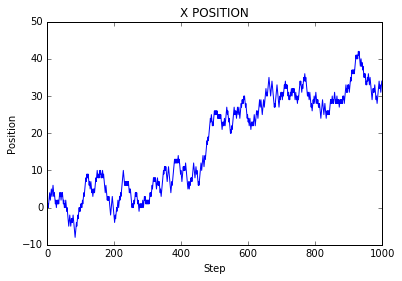

In [421]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def drunkards_walk(nSteps):
    '''returns numpy arrays of x positions and x^2 positions for the canonical drunkard's walk'''
    
    # CREATE RANDOM BINARY ARRAY THAT DICTATES STEP DIRECTION
    binary_array=np.random.randint(2,size=nSteps) 
    # INITIATE VARIABLES
    x_position=0
    xsqr_position=0
    x_positions=np.zeros((nSteps))
    xsqr_positions=np.zeros((nSteps))
    Steps=np.arange(nSteps)
    
    # FILL POSITION ARRAYS
    for i in range(nSteps):
        if (binary_array[i]==1):
            x_position+=1
            xsqr_position+=1
            x_positions[i]=x_position
            xsqr_positions[i]=xsqr_position
        else:
            x_position-=1
            xsqr_position+=1
            x_positions[i]=x_position
            xsqr_positions[i]=xsqr_position
    
    return Steps,x_positions,xsqr_positions

step,x,xsqr=drunkards_walk(1000)

plt.plot(step,x)
plt.xlabel('Step')
plt.ylabel('Position')
plt.title('X POSITION')

plt.show()

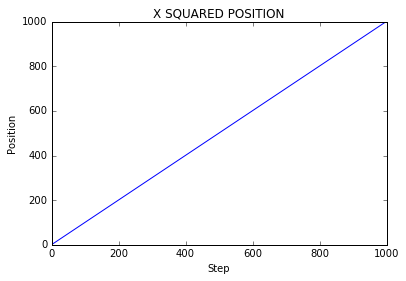

In [422]:
plt.plot(step,xsqr)
plt.xlabel('Step')
plt.ylabel('Position')
plt.title('X SQUARED POSITION')

### Problem 1b (revised Tuesday, May 23)

**This question has been revised for clarity.**

A useful quantity is the *average* of $x^2$ over all previous steps in the drunkard's walk. Call this $\langle x^2 \rangle_i$. For example, for the fifth step,  

$\langle x^2 \rangle_5 = \frac{1}{5}\left(x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2\right)$.  

However, an even *more* useful quantity is the average of $\langle x^2 \rangle_i$ over an ensemble of many drunkards. For example, if we had three drunkards (Alice, Bob, and Charlie), then this quantity, $\langle \langle x^2 \rangle_i \rangle$, is

$\langle \langle x^2 \rangle_i \rangle = \frac{1}{3}\left( \langle x^2 \rangle_i^A + \langle x^2 \rangle_i^B + \langle x^2 \rangle_i^C \right)$.  

For our purposes, pick `nWalkers=100`. This means that you will simulate `nWalkers` different random walks. The "average of $\langle x^2\rangle$ over walkers" gives an array of length `nSteps` where each element is an average of $\langle x^2 \rangle_i$ over the `nWalker` drunkards. 

Your code should output:  

$\langle \langle x^2 \rangle_i\rangle = \frac{1}{n_\text{Walkers}} \sum_{a} \langle x^2\rangle_i^a$  ,
where $a$ runs over the different drunkards.

The resulting plot as a function of step number should look much better behaved. In fact, it should fit to

$\langle \langle x^2 \rangle_i\rangle = 2 D t_i$,

where $D$ is the diffusion constant. That is: this plot should be linear in step number. What is the value of $D$ based on your plot?

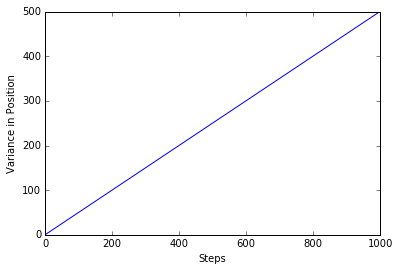

In [423]:

def drunkards_walk_var(nWalkers,nSteps):
    
    '''finds the variance of the canonical drunkards walk at each step for nWalkers different walks'''
    # INITIALIZE VARIABLES
    x_positions_var=[]
    all_x=np.zeros((nWalkers,nSteps))
    all_xsqr=np.zeros((nWalkers,nSteps))
    steps=np.arange(nSteps)
        
    # GENERATE WALKS
    for i in range(nWalkers):
        _,all_xsqr[i]=drunkards_walk(nSteps)[1:3]
    
    # CALCULATE VARIANCE FOR EACH STEP
    for i in range(nWalkers):
        x_positions_var_temp=[]
        xsqr_positions_temp=all_xsqr[i]
        for j in range(nSteps):
            x_positions_var_temp.append(np.mean(xsqr_positions_temp[0:j]))
        x_positions_var.append(x_positions_var_temp)
    
    x_positions_var=mean(x_positions_var,axis=0)

    return steps,x_positions_var

steps,x_positions_var=drunkards_walk_var(100,1000)
plt.plot(steps,x_positions_var)
plt.xlabel('Steps')
plt.ylabel('Variance in Position')

For this plot, $D=\frac{1}{4}$.

### Problem 1c

Do the same thing for a drunkard's walk in three dimensions. Define the position of the particle to be a `numpy` array with three components. It may be helpful to define `numpy` arrays with the possible directions one can traverse.

Store these directions in a list, `directions`.  A random step then corresponds to a shift by `sample(directions,1)[0]`. (Test this.)

What is the value of $D$ for the 3D drunkard's walk?

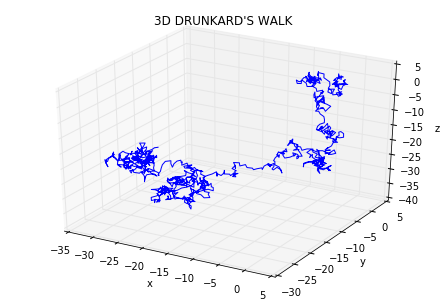

In [424]:
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from mpl_toolkits.mplot3d import Axes3D

def drunkards_walk_3D(nSteps,is2D=False,xlim=False,ylim=False,zlim=False):
    
    '''GENERATES 3D RANDOM WALK. COMPATIBLE WITH 2D CASE. USE lim PARAMETERS TO IMPOSE BORDER.'''
    
    # GENERATE RANDOM STEPS IN SPHERIAL COORDINATES
    phi_rand=2*pi-4*pi*np.random.random_sample((nSteps,)) # -2*pi <= 0 < 2*pi
    theta_rand=pi-2*pi*np.random.random_sample((nSteps,)) # -pi <= 0 < pi
    if is2D==False:
        theta_rand=pi-2*pi*np.random.random_sample((nSteps,)) # -pi <= 0 < pi
    else:
        theta_rand=np.zeros((nSteps)) # NOT ACTUALLY RANDOM
        theta_rand.fill(pi/2) # FORCE Z TO BE ZERO
        
    r_rand=np.ones((nSteps)) # NOT ACTUALLY RANDOM
    
    # INITIALIZE OTHER VARIABLES
    x_positions=np.zeros((nSteps))
    y_positions=np.zeros((nSteps))
    z_positions=np.zeros((nSteps))
    steps=np.arange(nSteps)
    
    x_position=0
    y_position=0
    z_position=0
    
    x_positions[0]=x_position
    y_positions[0]=y_position
    z_positions[0]=z_position
    
    # COORDINATE TRANSFORMATIONS
    def x(r,theta,phi):
        return r*sin(theta)*cos(phi)
    def y(r,theta,phi):
        return r*sin(theta)*sin(phi)
    def z(r,theta,phi):
        return r*cos(theta)
    
    for i in range(1,nSteps):
        
        x_positions[i]=x_position
        y_positions[i]=y_position
        z_positions[i]=z_position
        
        r=r_rand[i]
        theta=theta_rand[i]
        phi=phi_rand[i]      
        
        x_position+=x(r,theta,phi)
        y_position+=y(r,theta,phi)
        z_position+=z(r,theta,phi)
        
        # CONDITIONS TO MAKE DRUNKARD BOUNCE OFF ANY BORDERS
        if xlim==True:
            if np.absolute(x_position)>=xlim:
                if x>0:
                    x_position=xlim-(x_position-xlim)
                else:
                    x_position=-xlim+(x_position+xlim)
        elif ylim==True:
            if np.absolute(y_position)>=ylim:
                if y>0:
                    y_position=ylim-(y_position-ylim)
                else:
                    y_position=-ylim+(y_position+ylim)
        elif zlim==True:
            if np.absolute(z_position)>=zlim:
                if z>0:
                    z_position=zlim-(z_position-zlim)
                else:
                    z=-zlim+(z_position+zlim)
    
    return steps,x_positions,y_positions,z_positions

steps,xs,ys,zs=drunkards_walk_3D(1000)
ax=Axes3D(plt.gcf())
ax.plot(xs,ys,zs)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D DRUNKARD\'S WALK')

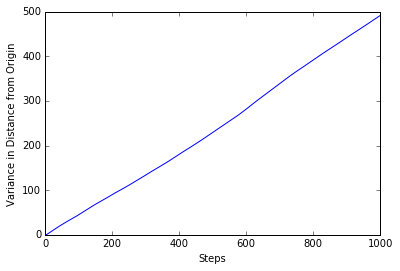

In [425]:
def drunkards_walk_3d_var(nWalkers,nSteps):    
    
    def r_sqr(x,y,z):
        return x**2+y**2+z**2
    r_sqr_vec=np.vectorize(r_sqr)
    
    rsqr_positions=np.zeros((nWalkers,nSteps))
        
    # GENERATE WALKS 
    for i in range(nWalkers):
        _,x_positions,y_positions,z_positions=drunkards_walk_3D(nSteps)
        # MAKE 1D
        rsqr_positions[i]=r_sqr_vec(x_positions,y_positions,z_positions)
    
    # COPY AND PASTE FROM 1D CASE
    
    r_positions_var=[]
    steps=range(nSteps)
    for i in range(nWalkers):
        r_positions_var_temp=[]
        rsqr_positions_temp=rsqr_positions[i]
        for j in range(nSteps):
            r_positions_var_temp.append(np.mean(rsqr_positions_temp[0:j]))
        r_positions_var.append(r_positions_var_temp)
    
    r_positions_var=mean(r_positions_var,axis=0)
    
    return steps,r_positions_var

steps,r_positions_var=drunkards_walk_3d_var(100,1000)
plt.plot(steps,r_positions_var)
plt.xlabel('Steps')
plt.ylabel('Variance in Distance from Origin')
plt.show()

$D\approx0.2$ in the 3D case.

### Problem 1.x (extra credit)

*This problem has no programming, I suggest working it out on paper and then sketching the proof here, with key steps written out explicitly*

Derive the diffusion equation from the discretized drunkard's walk. For simplicity, work in two dimensions. Let $P(i,j,t)$ be the probability of finding the drunkard at site $(i,j)$ and time $t$. You want to show:

$\displaystyle \frac{\partial P(x,y,t)}{\partial t} = D \nabla^2 P(x,y,t)$

The key to this is the insight that the probability that the drunkard is at position $(i,j)$ at time $t$ is given by the equally weighted average of the probabilities that the drunkard was at one of the adjacent positions. 

Use this insight to re-write $P(i,j,t) - P(i,j,t-1)$ as a sum of terms that reproduces the Laplacian. You remember what the discretized Laplacian looks like, right?

## Problem 2: Brownian Motion

Let's use the 2D drunkard's walk to model Brownian motion. 

### Problem 2a

Imagine a 2D box of length `L=101`. Place a "drunkard" in the middle of the grid. The drunkard moves in one step in any direction (north, east, south, west) each step. If the drunk hits the wall, forbit motion that goes outside of the box. 

Animate the position of the drunkard as a funtion of time for some period of time.

### Problem 2b

Same as problem 2a, but now populate the center of the box with 20 drunkards that each move randomly. For this problem, allow the drunkards to "stack" on top of each other if they overlap.

### Problem 2x (extra credit)

Semi-self-avoiding drunkards. Same as problem 2b, but now prohibit any motion that would cause drunkards to overlap with each other. You'll have to come up with some appropriate initial condition where the drunkards all start close to each other in the center of the box. There may be conditions where a drunkard cannot move.

<IPython.core.display.Javascript object>


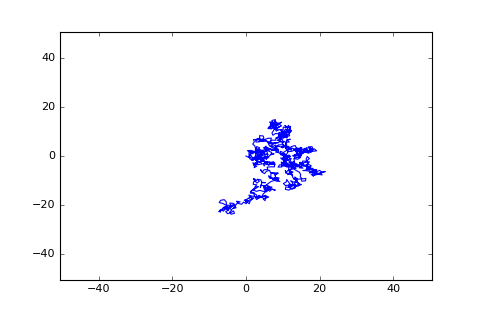

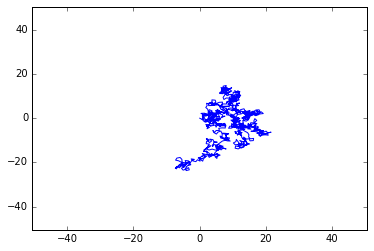

In [455]:
%matplotlib notebook
L=101.0
_,xs,ys,_=drunkards_walk_3D(1000,is2D=True,xlim=L/2,ylim=L/2)

fig,ax=plt.subplots()
line,=plt.plot(xs,ys)
ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)

for i in range(len(xs)):
    line.set_data(xs[:i],ys[:i])
    fig.canvas.draw()

<IPython.core.display.Javascript object>


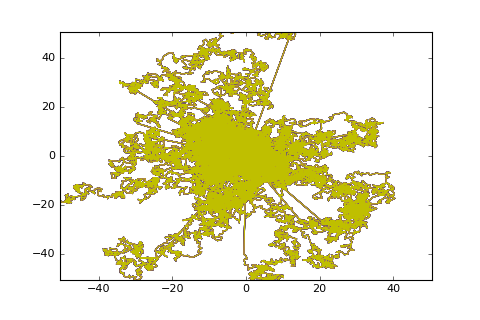

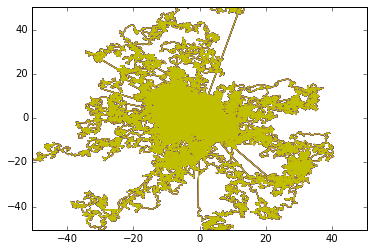

In [469]:
L=101.0
xs=np.zeros((20,1000))
ys=np.zeros((20,1000))
for i in range(0,20):
    _,xs[i],ys[i],_=drunkards_walk_3D(1000,is2D=True,xlim=L/2,ylim=L/2)

L=101.0

fig,ax=plt.subplots()
ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)

lines=[]
for j in range(len(xs)):
    line,=plt.plot(xs[j],ys[j])
    
    for i in range(len(xs[j])):
        line.set_data(xs[:i],ys[:i])
        fig.canvas.draw()

## Problem 3: Hyperspheres and Monte Carlo

Calculate the volume of a unit $n$-sphere for the cases $n$ = 2,3,4,5,6. Use the **Monte Carlo** "throwing marbles" method where you randomly sample points in an $n$-dimensional unit cube and keep track of how many points fall within the condition

$\sum_i^n x_i^2 < 1$.

Compare to the analytic formulae here: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

### Problem 3x

Plot the estimated hypervolume as a function of number of random samples used, and plot (as a horizontal line) the correct values from the analytic formula. Alternatively, plot the "difference from the true result" as a function of number of samples. 

Comment on how the number of samples required depends on the dimensionality of the hypersphere.

In [428]:
def n_sphere_volume(n,num_samples):
    cube=1-2*np.random.random_sample((n,1000))# CENTER THE SAMPLE AT ZERO
    inside=0
    outside=0
    for i in range(num_samples):
        sample_points=np.random.randint(-1000,1000,size=n)
        sqr_sum=0
        for j in range(n):
            sqr_sum+=cube[j,sample_points[j]]**2
        if sqr_sum>1:
            outside+=np.sum(np.absolute(cube[j,sample_points]))
        else:
            inside+=np.sum(np.absolute(cube[j,sample_points]))
 
    ratio=inside/num_samples
    volume=(2**n)*ratio
    return volume
    

In [429]:
nlist=[2,3,4,5,6]
for i in range(0,len(nlist)):
    print n_sphere_volume(nlist[i],10000)

2.87469824369
5.78566948475
9.26510563648
12.5231707375
14.3736642163
